# Optimisers from scratch
Following JH's lecture on various optimisers

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# generate random data for modelling
a = 25 # slope
b = -5 # intercept
n = 100
noise_scale = 10
x = np.random.randint(low = -10, high = 10, size = n)
sigma = noise_scale * np.random.normal(size = n)
y = (a * x + b) + sigma

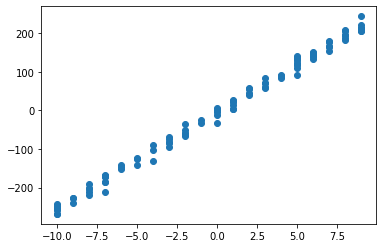

In [13]:
plt.scatter(x, y)

We are going to use squared error. For every batch, the loss therefore is:  
$L = \frac{1}{n}\sum_{i=1}^{n} (\hat{y} - y)^2$  
where y hat is our predicted y and L is our loss function. Inserting our function, we get:  
$L = \frac{1}{n}\sum_{i=1}^{n} (ax + b - y)^2$  
We are going to need the derivative of this with respect to each of our parameters (a and b). Using (Wolfram alpha)[https://www.wolframalpha.com]:  
$\frac{\delta}{\delta a} = 2x(ax + b - y)$  
$\frac{\delta}{\delta b} = 2(ax + b - y)$  

Check the differentiation by hand:  
$(ax + b - y)^2 =$  
$ax^2 + axb - axy + axb + b^2 -by -axy -by + y^2 =$  
$ax^2 + 2axb - 2axy + b^2 - 2by + y^2$  

Derivative wrt a:  
$2ax^2 + 2xb - 2xy =$  
$2x(ax + b - y)$  

In [28]:
def grad_a(x, y, a, b):
    return 2 * x * (a * x + b - y)
def grad_b(x, y, a, b):
    return 2 * (a * x + b - y)

In [33]:
def SGD(x, y, old_a, old_b, lr):
    """Stochastic gradient descent"""
    a_update = -lr * np.mean(grad_a(x, y, old_a, old_b))
    b_update = -lr * np.mean(grad_b(x, y, old_a, old_b))
    return(old_a + a_update, old_b + b_update)

In [53]:
epochs = 10
a = 1; b = 1
lr = .01
loss = []
for i in range(epochs):
    a, b = SGD(x, y, a, b, lr)
    y_hat = a * x + b
    loss.append(np.mean(np.square(y_hat - y)))

In [54]:
print("After {} epochs, a = {} and b = {}".format(epochs, a, b))

After 10 epochs, a = 24.872485132827883 and b = -0.14936352803137992


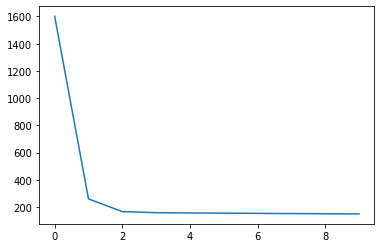

In [55]:
plt.plot(loss)

In [56]:
def SGD_with_momentum(x, y, old_a, old_b, lr, alpha = 0.9):
    """Stochastic gradient descent with momentum"""
    a_update = -lr * np.mean(grad_a(x, y, old_a, old_b))
    b_update = -lr * np.mean(grad_b(x, y, old_a, old_b))
    return(old_a + a_update, old_b + b_update)